In [133]:
import os, urllib
from urllib.request import urlretrieve

In [134]:
import mxnet as mx
sym, arg_params, aux_params = mx.model.load_checkpoint('Inception-BN', 0)

In [135]:
mod = mx.mod.Module(symbol=sym, context=mx.cpu())


In [136]:
mod.bind(for_training = False,
         data_shapes=[('data', (1,3,224,224))])
mod.set_params(arg_params, aux_params)

D:\Anaconda-Jupyter\lib\site-packages\mxnet\module\base_module.py:66: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [137]:
import numpy as np
import cv2

from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16



def get_image(filename):
    img = cv2.imread(filename)  # read image in b,g,r order
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # change to r,g,b order
    img = cv2.resize(img, (224, 224))  # resize to 224*224 to fit model
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)  # change to (channel, height, width)
    img = img[np.newaxis, :]  # extend to (example, channel, heigth, width)
    return img

In [138]:
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

In [139]:
import pandas as pd
all_cases_df = pd.read_table('C:/Users/victory/Desktop/MIAS/mammogram_info.csv', delimiter=' ')
#all_cases_df.head(5) 

In [140]:
all_layers = sym.get_internals()
all_layers.list_outputs()[-10:-1]

['bn_5b_proj_output',
 'relu_5b_proj_output',
 'ch_concat_5b_chconcat_output',
 'global_pool_output',
 'flatten_output',
 'fc1_weight',
 'fc1_bias',
 'fc1_output',
 'softmax_label']

In [141]:
all_layers = sym.get_internals()
sym3 = all_layers['flatten_output']
mod3 = mx.mod.Module(symbol=sym3, context=mx.cpu())
mod3.bind(for_training=False, data_shapes=[('data', (1,3,224,224))]) #batch size = 1 aw 32
mod3.set_params(arg_params, aux_params)

sym3.list_arguments()

D:\Anaconda-Jupyter\lib\site-packages\mxnet\module\base_module.py:54: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
D:\Anaconda-Jupyter\lib\site-packages\mxnet\module\base_module.py:66: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


['data',
 'conv_1_weight',
 'conv_1_bias',
 'bn_1_gamma',
 'bn_1_beta',
 'conv_2_red_weight',
 'conv_2_red_bias',
 'bn_2_red_gamma',
 'bn_2_red_beta',
 'conv_2_weight',
 'conv_2_bias',
 'bn_2_gamma',
 'bn_2_beta',
 'conv_3a_1x1_weight',
 'conv_3a_1x1_bias',
 'bn_3a_1x1_gamma',
 'bn_3a_1x1_beta',
 'conv_3a_3x3_reduce_weight',
 'conv_3a_3x3_reduce_bias',
 'bn_3a_3x3_reduce_gamma',
 'bn_3a_3x3_reduce_beta',
 'conv_3a_3x3_weight',
 'conv_3a_3x3_bias',
 'bn_3a_3x3_gamma',
 'bn_3a_3x3_beta',
 'conv_3a_double_3x3_reduce_weight',
 'conv_3a_double_3x3_reduce_bias',
 'bn_3a_double_3x3_reduce_gamma',
 'bn_3a_double_3x3_reduce_beta',
 'conv_3a_double_3x3_0_weight',
 'conv_3a_double_3x3_0_bias',
 'bn_3a_double_3x3_0_gamma',
 'bn_3a_double_3x3_0_beta',
 'conv_3a_double_3x3_1_weight',
 'conv_3a_double_3x3_1_bias',
 'bn_3a_double_3x3_1_gamma',
 'bn_3a_double_3x3_1_beta',
 'conv_3a_proj_weight',
 'conv_3a_proj_bias',
 'bn_3a_proj_gamma',
 'bn_3a_proj_beta',
 'conv_3b_1x1_weight',
 'conv_3b_1x1_bias',
 

In [142]:
#extraction of features of our classes
from PIL import Image
import glob


out=[]

data_pos_mal = np.array([get_image('C:/Users/victory/Desktop/MIAS/ClassMalignant/MalignantROI/'+img) for img in os.listdir('C:/Users/victory/Desktop/MIAS/ClassMalignant/MalignantROI/') if img.endswith('.jpg')])
data_pos_ben = np.array([get_image('C:/Users/victory/Desktop/MIAS/ClassBenign/BenignROInew/'+img) for img in os.listdir('C:/Users/victory/Desktop/MIAS/ClassBenign/BenignROInew/') if img.endswith('.jpg')])

data_pos= np.append(data_pos_mal,data_pos_ben,axis=0)

print (data_pos.shape)
print (data_pos_mal.shape)



(300, 1, 3, 224, 224)
(147, 1, 3, 224, 224)


In [143]:
for img in data_pos:
    mod3.forward(Batch([mx.nd.array(img)]))
    out.append(mod3.get_outputs()[0].asnumpy())
out = np.array(out)

print (out.shape)
X = out
X = X.reshape((X.shape[0], -1), order='F')
print (X.shape)

(300, 1, 1024)
(300, 1024)


In [144]:
Y = np.ones(300)                       #Alllabels
for i in range(len(Y)):
    if i >= 147: #positive size
        Y[i]= 0



In [ ]:
print(cv_scores)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", cv_scores.mean())

In [ ]:
print(Y)

In [ ]:
print (X.shape)

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)


In [81]:
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

print(features.shape)

[3.488e-02 9.029e-01 1.206e-01 ... 3.001e-01 7.012e-04 3.713e-03]
[[5.901e-01 4.881e-03 1.507e-01 1.548e-01 7.727e-01 0.000e+00 3.823e-01
  1.533e-01 1.609e-02 4.148e-03]
 [3.846e-01 0.000e+00 0.000e+00 1.707e-01 1.457e-01 0.000e+00 7.570e-01
  0.000e+00 3.213e-03 0.000e+00]
 [1.075e+00 1.160e-01 3.592e-02 7.462e-02 1.027e-02 0.000e+00 1.533e+00
  0.000e+00 5.961e-02 1.577e-03]
 [1.102e+00 4.046e-01 5.847e-01 2.880e-01 3.618e-01 0.000e+00 1.995e+00
  0.000e+00 4.165e-01 2.230e-01]
 [9.019e-01 3.976e-01 9.709e-02 2.370e-01 1.622e-01 0.000e+00 2.029e+00
  0.000e+00 3.582e-01 5.638e-01]]
(300, 10)


In [91]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components
print("Explained Variance: ", fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance:  [0.187 0.133 0.097 0.066 0.052 0.035 0.032 0.027 0.024 0.023]
[[-5.702e-02 -1.891e-01  3.044e-02 ... -3.126e-04 -4.623e-05  1.142e-03]
 [ 4.200e-02  1.094e-01 -2.607e-01 ...  1.300e-03  2.785e-04  2.156e-02]
 [-5.654e-02  5.056e-02 -1.738e-01 ... -9.599e-04 -1.626e-04 -2.657e-03]
 ...
 [ 1.206e-01  2.710e-02 -1.077e-02 ... -1.096e-03 -3.214e-04 -5.550e-03]
 [-8.136e-02 -5.439e-02  7.196e-02 ...  3.595e-04  3.142e-04 -4.161e-03]
 [-7.046e-02 -4.614e-02 -1.686e-02 ...  1.577e-03 -1.494e-04  1.503e-02]]


# Random Forest

In [145]:
from sklearn.model_selection import train_test_split

imgs_train, imgs_test, input_gts_train, input_gts_test, = train_test_split(X, Y, test_size=0.25, random_state=42) #0.3 and 12


In [146]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

#imgs_train= X[:200] #63 %
#input_gts_train = Y[:200]
#imgs_test = X[200:] #to do
#input_gts_test = Y[200:] 
#_________________________________________________________________________________________________________________________
split =3
dep = 1000 #140

Mrfc = RandomForestClassifier(n_estimators = 1000, #1000
                             bootstrap = True,
                             oob_score = True,
                             criterion = 'gini', 
                             max_features = 'auto',
                             class_weight="balanced" ,
                             max_depth = dep,
                             min_samples_split = 5, #int(10000 / split), 
                             min_samples_leaf = 10, #int(3000 / split), 
                             max_leaf_nodes = None,
                             n_jobs=-1
                            )

Mrfc.fit(imgs_train,input_gts_train)
input_gts_train0 = Mrfc.predict(imgs_train)
accuray_train = np.mean((input_gts_train0 - input_gts_train) ** 2)
print ('split is ' + str(split) + ' depth is ' + str(dep))
print ('train')
print(accuray_train, Mrfc.score(imgs_train,input_gts_train))
input_gts_test0 = Mrfc.predict(imgs_test)
accuray_test = np.mean((input_gts_test0 - input_gts_test) ** 2)
print ('test')
print(accuray_test, Mrfc.score(imgs_test,input_gts_test))
print("Done.")



split is 3 depth is 1000
train
0.0 1.0
test
0.29333333333333333 0.7066666666666667
Done.


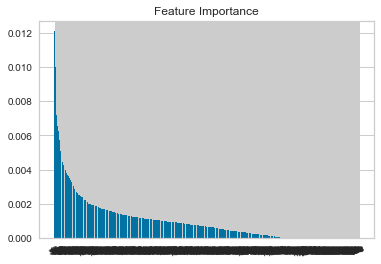

In [162]:
import matplotlib.pyplot as plt
# Calculate feature importances
importances = Mrfc.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), indices, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

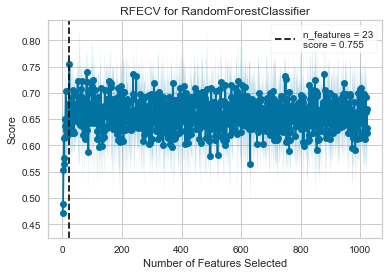

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.features import RFECV

cv = StratifiedKFold(5)
oz = RFECV(RandomForestClassifier(), step = 100, cv=cv, scoring='f1_weighted')

oz.fit(X, Y)
oz.poof()

In [95]:
from sklearn import tree   
from sklearn.model_selection import cross_val_score
#classifier
clf = tree.DecisionTreeClassifier()

clf = clf.fit(features, Y)

cv_scores = cross_val_score(clf, features, Y, cv=10)

cv_scores.mean()

0.6529959213941415

In [96]:
print(Mrfc.feature_importances_) #.mean()
feature_importance_sum = np.sum(clf.feature_importances_)
print(feature_importance_sum)

[0.068 0.057 0.191 0.083 0.069 0.121 0.091 0.071 0.131 0.118]
1.0


In [97]:
#    Implement K-Nearest Neighbors. Trained with K-Folds Cross validation with K=10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

scaler = StandardScaler()
scaler = scaler.fit(imgs_train)
x_train = scaler.transform(imgs_train)
x_test = scaler.transform(imgs_test)
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(imgs_train, input_gts_train)

score = clf.score(imgs_test, input_gts_test)
scores = model_selection.cross_val_score(clf, features, Y, cv=10)
print('K-Nearest Neighbor accuracy: ' + str(round(scores.mean()*100, 2)) + '%') 

K-Nearest Neighbor accuracy: 72.32%


In [98]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
clf = clf.fit(imgs_train, input_gts_train)
scores = model_selection.cross_val_score(clf, features, Y, cv=10)
print('Naive Bayes accuracy: ' + str(round(scores.mean()*100, 3)) + '%') 

Naive Bayes accuracy: 59.943%


In [99]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(imgs_train, input_gts_train)
scores = model_selection.cross_val_score(svc, features, Y, cv=10)
print('Support Vector Machine accuracy: ' + str(round(scores.mean()*100, 3)) + '%')

Support Vector Machine accuracy: 53.56%


In [101]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr = lgr.fit(imgs_train, input_gts_train)
scores = model_selection.cross_val_score(lgr, features, Y, cv=10)
print('Logistic Regression accuracy: ' + str(round(scores.mean()*100, 3)) + '%') 

Logistic Regression accuracy: 53.305%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = Mrfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(imgs_train, input_gts_train)
# print results
print(rfc_random.best_params_)

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


rfc_cv_score = cross_val_score(Mrfc, features, Y, cv=10, scoring='roc_auc') #cv=10


In [103]:
print("=== Confusion Matrix ===")
print(confusion_matrix(input_gts_test, input_gts_test0))
print('\n')
print("=== Classification Report ===")
print(classification_report(input_gts_test, input_gts_test0))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[23 16]
 [11 25]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.68      0.59      0.63        39
        1.0       0.61      0.69      0.65        36

avg / total       0.64      0.64      0.64        75



=== All AUC Scores ===
[0.804 0.817 0.904 0.68  0.756 0.662 0.676 0.757 0.852 0.648]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.755547619047619


In [ ]:
from sklearn import metrics
(precision, recall, fscore, support) = metrics.precision_recall_fscore_support(input_gts_test, input_gts_test0,
                                                        average='weighted', 
                                                        warn_for=tuple())
print(precision, recall, fscore, support)

In [21]:
img = get_image("C:/Users/victory/Desktop/Inbreast/neg/InbreastJPG/20587346.jpg")  
mod3.forward(Batch([mx.nd.array(img)]))
pred = (mod3.get_outputs()[0].asnumpy())
res = Mrfc.predict(pred)

#print (img.ndim)
#plt.imshow(img)
print (res)

[0.]


In [23]:
import tensorflow as tf
tf.VERSION

'1.10.0'